In [7]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [9]:
DATA                    = "/home/groups/comp3710/OASIS"  # Path to the dataset  # Use GPU if available, otherwise use CPU
LOCAL                   = "/Users/4vir4l/dev/data/keras_png_slices_data"
EPOCHS                  = 300 # Number of training epochs
LEARNING_RATE           = 1e-3  # Learning rate for optimization
BATCH_SIZE              = 32  # Batch size for training
LOG_RES                 = 7  # Logarithmic resolution used for 128*128 images
Z_DIM                   = 256  # Dimension of the latent space
W_DIM                   = 256  # Dimension of the mapping network output
LAMBDA_GP               = 10  # Weight for the gradient penalty term

In [24]:
def get_data(data, log_res, batchSize):

    transform = transforms.Compose(
        [   transforms.Resize(size=(2**log_res, 2**log_res), interpolation=transforms.InterpolationMode.BICUBIC),
            transforms.ToTensor(),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.Normalize(mean=[0.5], std=[0.5])
            ]
        )

    dataset = datasets.ImageFolder(root=data, transform=transform)

    loader = DataLoader(dataset, batchSize, shuffle=True)

    return loader

In [25]:
loader = get_data(LOCAL, LOG_RES, BATCH_SIZE)

Feature batch shape: torch.Size([32, 3, 128, 128])


TypeError: Invalid shape (3, 128, 128) for image data

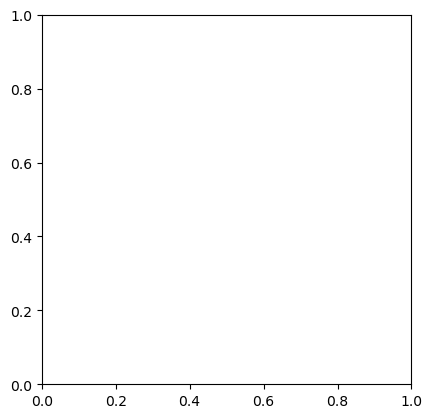

In [27]:
features, _ = next(iter(loader))
print(f"Feature batch shape: {features.size()}")
img = features[0].squeeze()
plt.imshow(img, cmap="gray")
plt.show()